In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:

!curl -L -o stroke-prediction-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/fedesoriano/stroke-prediction-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 69007  100 69007    0     0  47455      0  0:00:01  0:00:01 --:--:-- 65471


In [3]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Preparation

In [6]:
df.columns = df.columns.str.lower()

In [7]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(df.dtypes[df.dtypes != 'object'].index)

In [8]:
categorical

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [9]:
numerical

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [10]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,male,female,male,female,female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,yes,yes,yes,yes,yes
work_type,private,self-employed,private,private,self-employed
residence_type,urban,rural,rural,urban,rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


### Handle null values

In [12]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
missing_bmi_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_bmi_percentages)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


missing bmi are a small % so we can delete

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never_smoked,1
5,56669,male,81.0,0,0,yes,private,urban,186.21,29.0,formerly_smoked,1


### Handle unique IDs

In [17]:
df.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [18]:
del df['id']

In [19]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### Exploratory Data Analysis

In [20]:
df.head().T

,0,2,3,4,5
gender,male,male,female,female,male
age,67.0,80.0,49.0,79.0,81.0
hypertension,0,0,0,1,0
heart_disease,1,1,0,0,0
ever_married,yes,yes,yes,yes,yes
work_type,private,private,private,self-employed,private
residence_type,urban,rural,urban,rural,urban
avg_glucose_level,228.69,105.92,171.23,174.12,186.21
bmi,36.6,32.5,34.4,24.0,29.0
smoking_status,formerly_smoked,never_smoked,smokes,never_smoked,formerly_smoked


In [21]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [22]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [23]:
len(df_train), len(df_val), len(df_test)

(2945, 982, 982)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [26]:
df_full_train = df_full_train.reset_index(drop=True)

In [27]:
df_full_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Distribution of target variable

In [28]:
df_full_train.stroke.value_counts(normalize=True)

stroke
0    0.959766
1    0.040234
Name: proportion, dtype: float64

In [29]:
df_full_train.stroke.mean()

np.float64(0.040234275528393176)

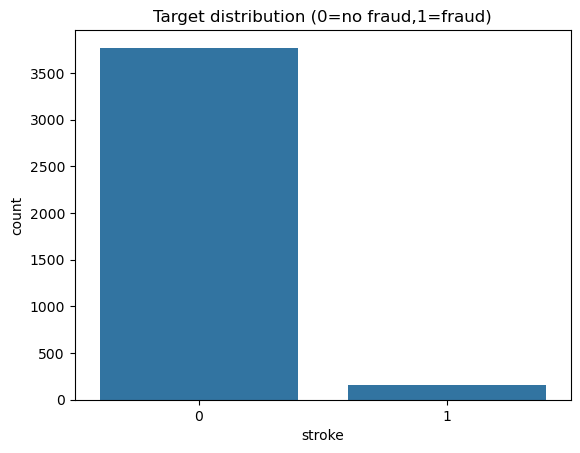

In [30]:
sns.countplot(x='stroke', data=df_full_train)
plt.title("Target distribution (0=no fraud,1=fraud)")
plt.show()

### Distribution of Categorical features

In [31]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(df.dtypes[df.dtypes != 'object'].index)

In [32]:
df_full_train[categorical].nunique()

gender            3
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [33]:
from IPython.display import display, Markdown

for c in categorical:
    display(Markdown(f"**{c}**"))
    display(df_full_train[c].value_counts())

**gender**

gender
female    2309
male      1617
other        1
Name: count, dtype: int64

**ever_married**

ever_married
yes    2567
no     1360
Name: count, dtype: int64

**work_type**

work_type
private          2266
self-employed     602
children          527
govt_job          513
never_worked       19
Name: count, dtype: int64

**residence_type**

residence_type
urban    2022
rural    1905
Name: count, dtype: int64

**smoking_status**

smoking_status
never_smoked       1471
unknown            1190
formerly_smoked     667
smokes              599
Name: count, dtype: int64

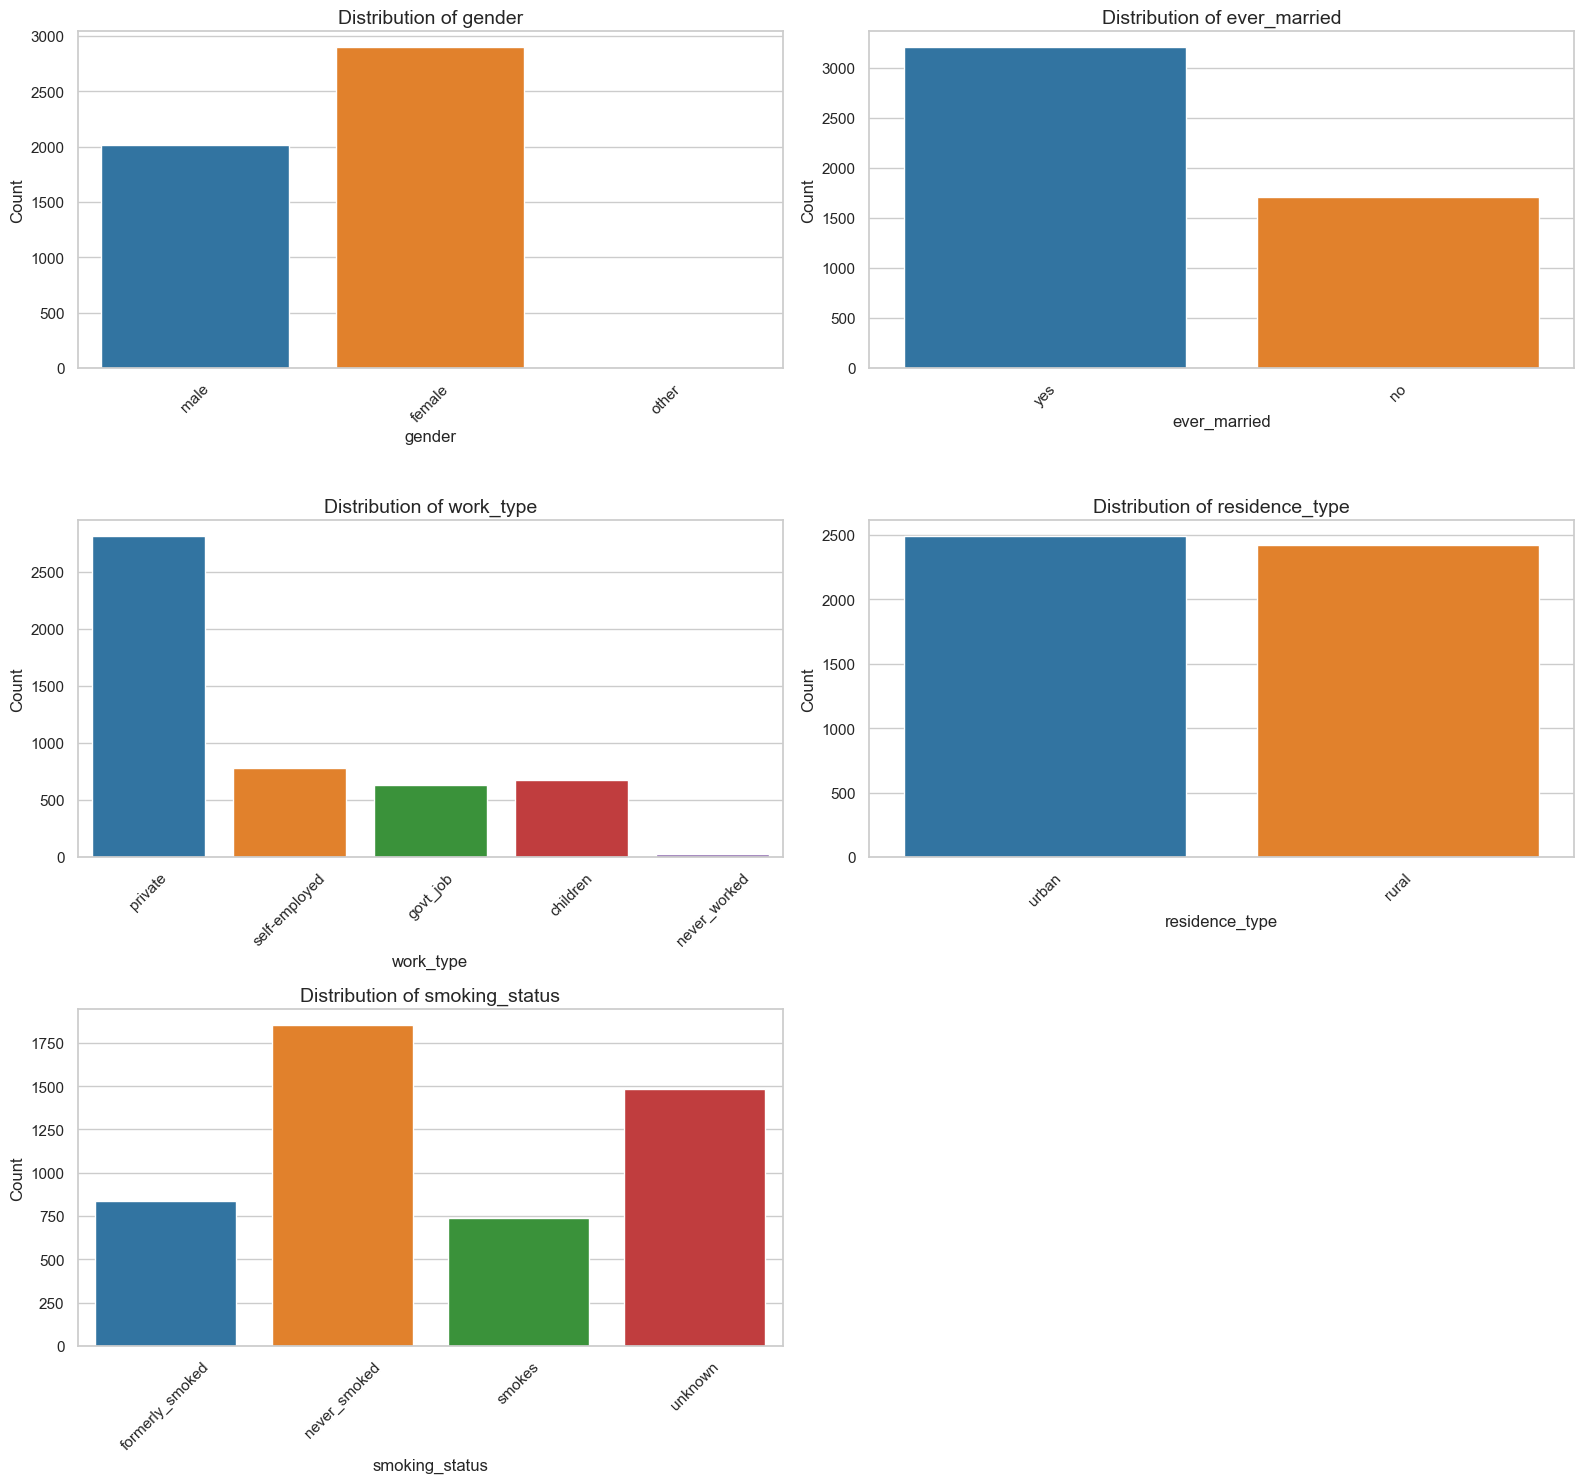

In [34]:
sns.set(style="whitegrid")

n_cols = 2
n_rows = (len(categorical) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical):
    sns.countplot(
        data=df,
        x=col,
        hue=col,             
        palette="tab10",
        legend=False,         
        ax=axes[i]
    )
    
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature importance: Mutual Information

In [35]:
from sklearn.metrics import mutual_info_score
def mutual_info_stroke_score(series):
    return mutual_info_score(series, df_full_train.stroke)

mi = df_full_train[categorical].apply(mutual_info_stroke_score)
mi.sort_values(ascending=False)

work_type         0.006495
ever_married      0.006328
smoking_status    0.004196
residence_type    0.000024
gender            0.000023
dtype: float64

### Feature Importance: Correlation coefficient

In [36]:
numerical = list(df_train.dtypes[df.dtypes != 'object'].index)
df_full_train[numerical].corrwith(df_full_train['stroke'])


age                  0.224232
hypertension         0.128475
heart_disease        0.131597
avg_glucose_level    0.132942
bmi                  0.034615
dtype: float64

### Heat Map

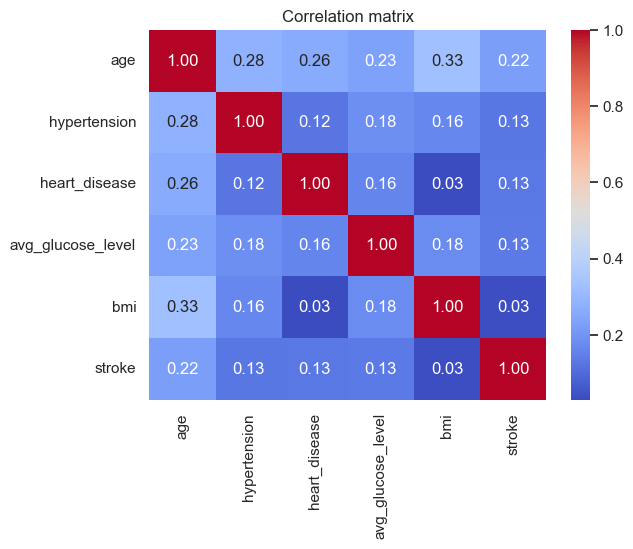

In [37]:
sns.heatmap(df_full_train[numerical + ['stroke']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

### One hot encoding

In [38]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [39]:
dv.get_feature_names_out()

array(['age', 'avg_glucose_level', 'bmi', 'ever_married=no',
       'ever_married=yes', 'gender=female', 'gender=male', 'gender=other',
       'heart_disease', 'hypertension', 'residence_type=rural',
       'residence_type=urban', 'smoking_status=formerly_smoked',
       'smoking_status=never_smoked', 'smoking_status=smokes',
       'smoking_status=unknown', 'work_type=children',
       'work_type=govt_job', 'work_type=never_worked',
       'work_type=private', 'work_type=self-employed'], dtype=object)

# Training Models

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Training with different values of C

In [41]:
for c in [0.01, 0.03, 0.05, 0.09 ,0.1 ,1 ,2 ,3 ,4 , 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    model = LogisticRegression(C=c, solver='lbfgs', max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
    final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
    print("C -> %f, accuracy %f, roc_auc_score %f" % (c,round(final_accuracy_score,3),round(final_roc_auc_score, 3)))

C -> 0.010000, accuracy 0.789000, roc_auc_score 0.703000
C -> 0.030000, accuracy 0.784000, roc_auc_score 0.701000
C -> 0.050000, accuracy 0.787000, roc_auc_score 0.702000
C -> 0.090000, accuracy 0.791000, roc_auc_score 0.694000
C -> 0.100000, accuracy 0.791000, roc_auc_score 0.694000
C -> 1.000000, accuracy 0.782000, roc_auc_score 0.689000
C -> 2.000000, accuracy 0.782000, roc_auc_score 0.689000
C -> 3.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 4.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 5.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 6.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 7.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 8.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 9.000000, accuracy 0.780000, roc_auc_score 0.688000
C -> 10.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 20.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 30.000000, accuracy 0.781000, roc_auc_score 0.689000
C -> 40.000000, accuracy 0.7

### Best Params

In [42]:
c=0.01
model = LogisticRegression(C=c, solver='lbfgs', max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
print("C -> %f, accuracy %f, roc_auc_score %f" % (c,round(final_accuracy_score,2),round(final_roc_auc_score, 2)))

C -> 0.010000, accuracy 0.790000, roc_auc_score 0.700000


## Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier

### Training with different values of max_depth

In [44]:
for n in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=n, criterion='gini', random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
    final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
    print("max_depth -> %f, accuracy %f, final_roc_auc_score %f"  % (n,round(final_accuracy_score,3),round(final_roc_auc_score, 3)))

max_depth -> 1.000000, accuracy 0.857000, final_roc_auc_score 0.636000
max_depth -> 2.000000, accuracy 0.857000, final_roc_auc_score 0.636000
max_depth -> 3.000000, accuracy 0.857000, final_roc_auc_score 0.636000
max_depth -> 4.000000, accuracy 0.773000, final_roc_auc_score 0.664000
max_depth -> 5.000000, accuracy 0.734000, final_roc_auc_score 0.675000
max_depth -> 6.000000, accuracy 0.764000, final_roc_auc_score 0.669000
max_depth -> 7.000000, accuracy 0.835000, final_roc_auc_score 0.686000
max_depth -> 8.000000, accuracy 0.833000, final_roc_auc_score 0.695000
max_depth -> 9.000000, accuracy 0.853000, final_roc_auc_score 0.696000
max_depth -> 10.000000, accuracy 0.871000, final_roc_auc_score 0.643000
max_depth -> 11.000000, accuracy 0.892000, final_roc_auc_score 0.592000
max_depth -> 12.000000, accuracy 0.898000, final_roc_auc_score 0.585000
max_depth -> 13.000000, accuracy 0.911000, final_roc_auc_score 0.571000
max_depth -> 14.000000, accuracy 0.916000, final_roc_auc_score 0.574000
m

### Training with different values of min_samples_leaf

In [45]:
for s in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=9,min_samples_leaf=s, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
    final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
    print("min_samples_leaf -> %f, accuracy %f, final_roc_auc_score %f" % (s,round(final_accuracy_score,3),round(final_roc_auc_score, 3)))

min_samples_leaf -> 1.000000, accuracy 0.853000, final_roc_auc_score 0.696000
min_samples_leaf -> 2.000000, accuracy 0.860000, final_roc_auc_score 0.648000
min_samples_leaf -> 3.000000, accuracy 0.856000, final_roc_auc_score 0.625000
min_samples_leaf -> 4.000000, accuracy 0.856000, final_roc_auc_score 0.635000
min_samples_leaf -> 5.000000, accuracy 0.857000, final_roc_auc_score 0.636000
min_samples_leaf -> 6.000000, accuracy 0.843000, final_roc_auc_score 0.618000
min_samples_leaf -> 7.000000, accuracy 0.855000, final_roc_auc_score 0.655000
min_samples_leaf -> 8.000000, accuracy 0.844000, final_roc_auc_score 0.670000
min_samples_leaf -> 9.000000, accuracy 0.837000, final_roc_auc_score 0.656000
min_samples_leaf -> 10.000000, accuracy 0.838000, final_roc_auc_score 0.688000
min_samples_leaf -> 11.000000, accuracy 0.825000, final_roc_auc_score 0.681000
min_samples_leaf -> 12.000000, accuracy 0.826000, final_roc_auc_score 0.671000
min_samples_leaf -> 13.000000, accuracy 0.824000, final_roc_a

### Training with different min_samples_split

In [46]:
for m in range(2, 20):
    dt = DecisionTreeClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=m, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
    final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
    print("min_samples_split -> %f, accuracy %f, roc_auc_score %f" % (m,round(final_accuracy_score,3), round(final_roc_auc_score, 3)))

min_samples_split -> 2.000000, accuracy 0.924000, roc_auc_score 0.536000
min_samples_split -> 3.000000, accuracy 0.913000, roc_auc_score 0.531000
min_samples_split -> 4.000000, accuracy 0.909000, roc_auc_score 0.539000
min_samples_split -> 5.000000, accuracy 0.907000, roc_auc_score 0.559000
min_samples_split -> 6.000000, accuracy 0.898000, roc_auc_score 0.575000
min_samples_split -> 7.000000, accuracy 0.895000, roc_auc_score 0.594000
min_samples_split -> 8.000000, accuracy 0.892000, roc_auc_score 0.582000
min_samples_split -> 9.000000, accuracy 0.895000, roc_auc_score 0.594000
min_samples_split -> 10.000000, accuracy 0.893000, roc_auc_score 0.603000
min_samples_split -> 11.000000, accuracy 0.888000, roc_auc_score 0.611000
min_samples_split -> 12.000000, accuracy 0.887000, roc_auc_score 0.620000
min_samples_split -> 13.000000, accuracy 0.877000, roc_auc_score 0.625000
min_samples_split -> 14.000000, accuracy 0.874000, roc_auc_score 0.624000
min_samples_split -> 15.000000, accuracy 0.874

### Best Params

In [47]:
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
print("accuracy -> %f, roc_auc_score %f" % (round(final_accuracy_score,2),round(final_roc_auc_score,2)))

accuracy -> 0.850000, roc_auc_score 0.700000


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

### Training with different values if n_estimators

n_estimators= -> 1.000000, accuracy 0.931000, roc_auc_score 0.499000
n_estimators= -> 2.000000, accuracy 0.903000, roc_auc_score 0.557000
n_estimators= -> 3.000000, accuracy 0.876000, roc_auc_score 0.552000
n_estimators= -> 4.000000, accuracy 0.859000, roc_auc_score 0.565000
n_estimators= -> 5.000000, accuracy 0.837000, roc_auc_score 0.573000
n_estimators= -> 6.000000, accuracy 0.827000, roc_auc_score 0.589000
n_estimators= -> 7.000000, accuracy 0.819000, roc_auc_score 0.595000
n_estimators= -> 8.000000, accuracy 0.802000, roc_auc_score 0.586000
n_estimators= -> 9.000000, accuracy 0.784000, roc_auc_score 0.577000
n_estimators= -> 10.000000, accuracy 0.767000, roc_auc_score 0.568000
n_estimators= -> 11.000000, accuracy 0.747000, roc_auc_score 0.578000
n_estimators= -> 12.000000, accuracy 0.739000, roc_auc_score 0.584000
n_estimators= -> 13.000000, accuracy 0.727000, roc_auc_score 0.578000
n_estimators= -> 14.000000, accuracy 0.716000, roc_auc_score 0.582000
n_estimators= -> 15.000000, a

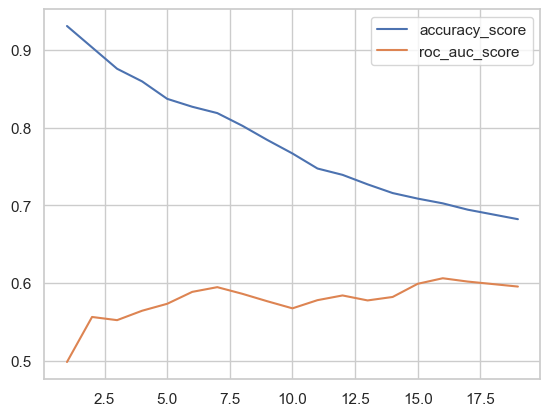

In [49]:
scores = []

for n in range(1, 20):
    rf = RandomForestClassifier(n_estimators=n, n_jobs=1, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1 ]
    final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
    final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
    print("n_estimators= -> %f, accuracy %f, roc_auc_score %f" % (n,round(final_accuracy_score,3), round(final_roc_auc_score, 3)))
    scores.append((n, final_accuracy_score, final_roc_auc_score))

columns = ['estimators', 'accuracy_score', 'roc_auc_score']
df_results = pd.DataFrame(scores, columns=columns)
plt.plot(df_results['estimators'], df_results['accuracy_score'], label='accuracy_score')
plt.plot(df_results['estimators'], df_results['roc_auc_score'], label='roc_auc_score')
plt.legend()
plt.show()


### Trying different values of max_depth

max_depth -> 1.000000, accuracy 0.823000, roc_auc_score 0.618000
max_depth -> 2.000000, accuracy 0.823000, roc_auc_score 0.649000
max_depth -> 3.000000, accuracy 0.814000, roc_auc_score 0.685000
max_depth -> 4.000000, accuracy 0.799000, roc_auc_score 0.667000
max_depth -> 5.000000, accuracy 0.783000, roc_auc_score 0.638000
max_depth -> 6.000000, accuracy 0.791000, roc_auc_score 0.663000
max_depth -> 7.000000, accuracy 0.790000, roc_auc_score 0.642000
max_depth -> 8.000000, accuracy 0.810000, roc_auc_score 0.652000
max_depth -> 9.000000, accuracy 0.789000, roc_auc_score 0.621000
max_depth -> 10.000000, accuracy 0.784000, roc_auc_score 0.659000
max_depth -> 11.000000, accuracy 0.764000, roc_auc_score 0.607000
max_depth -> 12.000000, accuracy 0.741000, roc_auc_score 0.647000
max_depth -> 13.000000, accuracy 0.766000, roc_auc_score 0.712000
max_depth -> 14.000000, accuracy 0.741000, roc_auc_score 0.606000
max_depth -> 15.000000, accuracy 0.723000, roc_auc_score 0.586000
max_depth -> 16.000

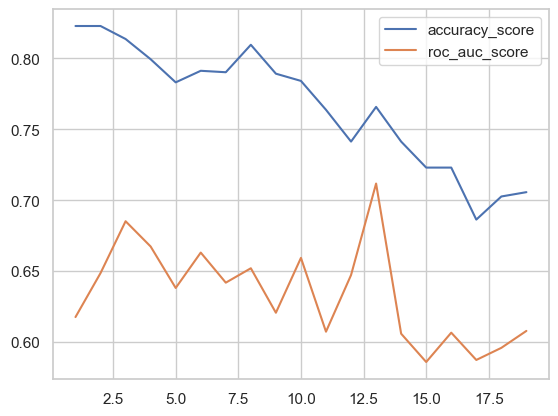

In [50]:
scores = []

for d in range(1, 20):
    rf = RandomForestClassifier(n_estimators=16, n_jobs=1, random_state=1, max_depth=d)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1 ]
    final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
    final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
    print("max_depth -> %f, accuracy %f, roc_auc_score %f" % (d,round(final_accuracy_score,3), round(final_roc_auc_score, 3)))
    scores.append((d, final_accuracy_score, final_roc_auc_score))

columns = ['max_depth', 'accuracy_score', 'roc_auc_score']
df_results = pd.DataFrame(scores, columns=columns)
plt.plot(df_results['max_depth'], df_results['accuracy_score'], label='accuracy_score')
plt.plot(df_results['max_depth'], df_results['roc_auc_score'], label='roc_auc_score')
plt.legend()
plt.show()

min_samples_leaf -> 1.000000, accuracy 0.766000, roc_auc_score 0.712000
min_samples_leaf -> 2.000000, accuracy 0.754000, roc_auc_score 0.592000
min_samples_leaf -> 3.000000, accuracy 0.770000, roc_auc_score 0.683000
min_samples_leaf -> 4.000000, accuracy 0.770000, roc_auc_score 0.693000
min_samples_leaf -> 5.000000, accuracy 0.782000, roc_auc_score 0.658000
min_samples_leaf -> 6.000000, accuracy 0.772000, roc_auc_score 0.684000
min_samples_leaf -> 7.000000, accuracy 0.768000, roc_auc_score 0.640000
min_samples_leaf -> 8.000000, accuracy 0.768000, roc_auc_score 0.640000
min_samples_leaf -> 9.000000, accuracy 0.764000, roc_auc_score 0.680000
min_samples_leaf -> 10.000000, accuracy 0.771000, roc_auc_score 0.683000
min_samples_leaf -> 11.000000, accuracy 0.763000, roc_auc_score 0.689000
min_samples_leaf -> 12.000000, accuracy 0.780000, roc_auc_score 0.678000
min_samples_leaf -> 13.000000, accuracy 0.771000, roc_auc_score 0.663000
min_samples_leaf -> 14.000000, accuracy 0.763000, roc_auc_sc

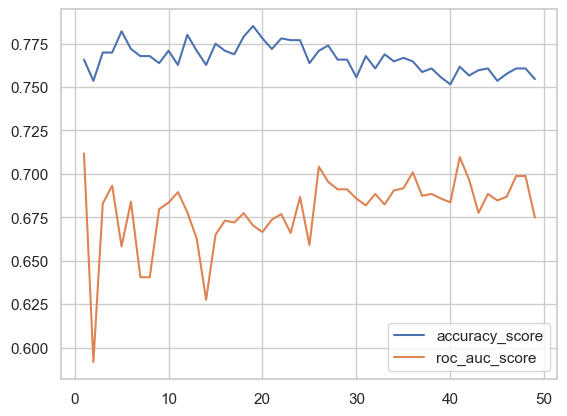

In [51]:
scores = []

for l in range(1, 50):
    rf = RandomForestClassifier(n_estimators=16, n_jobs=1, random_state=1, max_depth=13, min_samples_leaf=l)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1 ]
    final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
    final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
    print("min_samples_leaf -> %f, accuracy %f, roc_auc_score %f" % (l,round(final_accuracy_score,3), round(final_roc_auc_score, 3)))
    scores.append((l, final_accuracy_score, final_roc_auc_score))

columns = ['min_samples_leaf', 'accuracy_score', 'roc_auc_score']
df_results = pd.DataFrame(scores, columns=columns)
plt.plot(df_results['min_samples_leaf'], df_results['accuracy_score'], label='accuracy_score')
plt.plot(df_results['min_samples_leaf'], df_results['roc_auc_score'], label='roc_auc_score')
plt.legend()
plt.show()

### Best params

In [52]:
scores = []


rf = RandomForestClassifier(n_estimators=16, n_jobs=1, random_state=1, max_depth=13)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:,1 ]
final_accuracy_score = accuracy_score(y_val, y_pred >= 0.05)
final_roc_auc_score = roc_auc_score(y_val, y_pred >= 0.05)
print("accuracy %f, roc_auc_score %f" % (round(final_accuracy_score,2), round(final_roc_auc_score, 2)))


accuracy 0.770000, roc_auc_score 0.710000


## XGBOOST

In [53]:
import xgboost as xgb

In [54]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [55]:
output = []
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [56]:
%%capture output
df_score = []
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

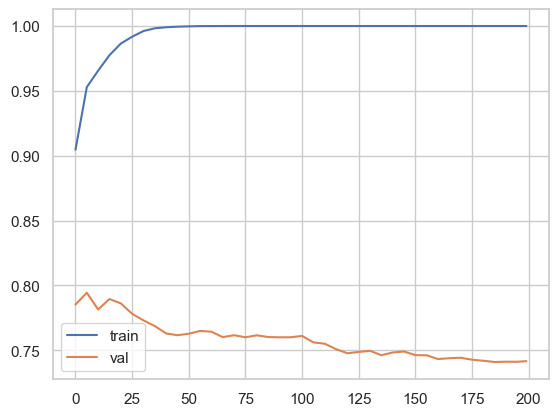

,num_iter,train_auc,val_auc
0,0,0.90464,0.78534
1,5,0.95291,0.79442
2,10,0.96558,0.78155
3,15,0.97752,0.78956
4,20,0.98645,0.78623
5,25,0.99174,0.77817
6,30,0.99613,0.77311
7,35,0.99823,0.76874
8,40,0.99904,0.76305
9,45,0.99949,0.76168


In [57]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()
df_score

### Training with multiple values of eta

In [58]:
for e in [0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    xgb_params = {
        'eta': e, 
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    auc_score = roc_auc_score(y_val, y_pred)
    print("eta %f ->  auc_score %f " % (e,  auc_score))

eta 0.010000 ->  auc_score 0.776129 
eta 0.100000 ->  auc_score 0.784351 
eta 0.200000 ->  auc_score 0.771414 
eta 0.300000 ->  auc_score 0.759848 
eta 0.400000 ->  auc_score 0.747561 
eta 0.500000 ->  auc_score 0.743334 
eta 0.600000 ->  auc_score 0.733672 
eta 0.700000 ->  auc_score 0.737319 
eta 0.800000 ->  auc_score 0.730792 
eta 0.900000 ->  auc_score 0.706452 


### Training with different max_depth

In [60]:
for d in range(1,50):
    xgb_params = {
        'eta': 0.1, 
        'min_child_weight': 1,
        'max_depth': d,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    auc_score = roc_auc_score(y_val, y_pred)
    print("max_depth %f ->  auc_score %f " % (d,  auc_score))

max_depth 1.000000 ->  auc_score 0.818144 
max_depth 2.000000 ->  auc_score 0.823811 
max_depth 3.000000 ->  auc_score 0.809783 
max_depth 4.000000 ->  auc_score 0.801236 
max_depth 5.000000 ->  auc_score 0.795127 
max_depth 6.000000 ->  auc_score 0.784351 
max_depth 7.000000 ->  auc_score 0.786278 
max_depth 8.000000 ->  auc_score 0.770601 
max_depth 9.000000 ->  auc_score 0.770090 
max_depth 10.000000 ->  auc_score 0.769138 
max_depth 11.000000 ->  auc_score 0.776524 
max_depth 12.000000 ->  auc_score 0.765700 
max_depth 13.000000 ->  auc_score 0.775850 
max_depth 14.000000 ->  auc_score 0.769858 
max_depth 15.000000 ->  auc_score 0.761938 
max_depth 16.000000 ->  auc_score 0.762611 
max_depth 17.000000 ->  auc_score 0.767001 
max_depth 18.000000 ->  auc_score 0.761102 
max_depth 19.000000 ->  auc_score 0.761729 
max_depth 20.000000 ->  auc_score 0.767559 
max_depth 21.000000 ->  auc_score 0.757270 
max_depth 22.000000 ->  auc_score 0.767164 
max_depth 23.000000 ->  auc_score 0.75919

### Training with different values of gamma

In [61]:
for g in range(1,50):
    xgb_params = {
        'eta': 0.1, 
        'min_child_weight': 1,
        'max_depth': 2,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'gamma': g,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    auc_score = roc_auc_score(y_val, y_pred)
    print("gamma %f ->  auc_score %f " % (g,  auc_score))

gamma 1.000000 ->  auc_score 0.825518 
gamma 2.000000 ->  auc_score 0.823462 
gamma 3.000000 ->  auc_score 0.822719 
gamma 4.000000 ->  auc_score 0.823056 
gamma 5.000000 ->  auc_score 0.824693 
gamma 6.000000 ->  auc_score 0.828444 
gamma 7.000000 ->  auc_score 0.827945 
gamma 8.000000 ->  auc_score 0.823590 
gamma 9.000000 ->  auc_score 0.824241 
gamma 10.000000 ->  auc_score 0.823613 
gamma 11.000000 ->  auc_score 0.823497 
gamma 12.000000 ->  auc_score 0.823265 
gamma 13.000000 ->  auc_score 0.822777 
gamma 14.000000 ->  auc_score 0.824380 
gamma 15.000000 ->  auc_score 0.823788 
gamma 16.000000 ->  auc_score 0.824508 
gamma 17.000000 ->  auc_score 0.824508 
gamma 18.000000 ->  auc_score 0.824508 
gamma 19.000000 ->  auc_score 0.824066 
gamma 20.000000 ->  auc_score 0.824066 
gamma 21.000000 ->  auc_score 0.824066 
gamma 22.000000 ->  auc_score 0.822859 
gamma 23.000000 ->  auc_score 0.822859 
gamma 24.000000 ->  auc_score 0.822952 
gamma 25.000000 ->  auc_score 0.822952 
gamma 26.

### Training with different values of min_child_weight

In [62]:
for c in range(1,200,10):
    xgb_params = {
        'eta': 0.1, 
        'min_child_weight': 1,
        'max_depth': 2,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'gamma':6,
        'min_child_weight': c,
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    auc_score = roc_auc_score(y_val, y_pred)
    print("min_child_weight %f ->  auc_score %f " % (c,  auc_score))

min_child_weight 1.000000 ->  auc_score 0.828444 
min_child_weight 11.000000 ->  auc_score 0.827434 
min_child_weight 21.000000 ->  auc_score 0.830291 
min_child_weight 31.000000 ->  auc_score 0.827643 
min_child_weight 41.000000 ->  auc_score 0.789843 
min_child_weight 51.000000 ->  auc_score 0.815461 
min_child_weight 61.000000 ->  auc_score 0.500000 
min_child_weight 71.000000 ->  auc_score 0.500000 
min_child_weight 81.000000 ->  auc_score 0.500000 
min_child_weight 91.000000 ->  auc_score 0.500000 
min_child_weight 101.000000 ->  auc_score 0.500000 
min_child_weight 111.000000 ->  auc_score 0.500000 
min_child_weight 121.000000 ->  auc_score 0.500000 
min_child_weight 131.000000 ->  auc_score 0.500000 
min_child_weight 141.000000 ->  auc_score 0.500000 
min_child_weight 151.000000 ->  auc_score 0.500000 
min_child_weight 161.000000 ->  auc_score 0.500000 
min_child_weight 171.000000 ->  auc_score 0.500000 
min_child_weight 181.000000 ->  auc_score 0.500000 
min_child_weight 191.00

### Training with different values of max_delta_step

In [63]:
for s in range(0,10):
    xgb_params = {
        'eta': 0.1, 
        'min_child_weight': 1,
        'max_depth': 2,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'gamma':6,
        'min_child_weight': 1,
        'seed': 1,
        'verbosity': 1,
        'max_delta_step': s,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    auc_score = roc_auc_score(y_val, y_pred)
    print("max_delta_stept %f ->  auc_score %f " % (s,  auc_score))

max_delta_stept 0.000000 ->  auc_score 0.828444 
max_delta_stept 1.000000 ->  auc_score 0.826041 
max_delta_stept 2.000000 ->  auc_score 0.823358 
max_delta_stept 3.000000 ->  auc_score 0.824937 
max_delta_stept 4.000000 ->  auc_score 0.828444 
max_delta_stept 5.000000 ->  auc_score 0.828444 
max_delta_stept 6.000000 ->  auc_score 0.828444 
max_delta_stept 7.000000 ->  auc_score 0.828444 
max_delta_stept 8.000000 ->  auc_score 0.828444 
max_delta_stept 9.000000 ->  auc_score 0.828444 


### Best Params

In [64]:
xgb_params = {
    'eta': 0.1, 
    'min_child_weight': 1,
    'max_depth': 2,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'gamma':6,
    'min_child_weight': 1,
    'seed': 1,
    'verbosity': 1,
    'max_delta_step': 0,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                 )
y_pred = model.predict(dval)

auc_score = roc_auc_score(y_val, y_pred)
print("auc_score %f " % (round(auc_score,2)))

auc_score 0.830000 


## Choosing Best Model

<span style='color:red'>Logistic regression -> auc 0.70</span><br>
<span style='color:red'>Decision tree -> auc 0.70</span><br>
<span style='color:red'>Random forest -> auc 0.71</span><br>
<span style='color:green'>Xboost -> auc 0.83</span>

# KFold verification of Model

In [65]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
n_splits = 5


kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)


for train_idx, val_idx in kfold.split(df_full_train):
    df_train_k = df_full_train.iloc[train_idx].copy()
    df_val_k = df_full_train.iloc[val_idx].copy()

    y_train_k = df_train_k.stroke
    y_val_k = df_val_k.stroke

    del df_train_k["stroke"]
    del df_val_k["stroke"]
    
    train_dicts_k = df_train_k.to_dict(orient='records')
    val_dicts_k = df_val_k.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train_k = dv.fit_transform(train_dicts_k)
    features = list(dv.get_feature_names_out())
    X_val_k = dv.transform(val_dicts_k)
    dtrain_k = xgb.DMatrix(X_train_k, label=y_train_k, feature_names=features)
    dval_k = xgb.DMatrix(X_val_k, label=y_val_k, feature_names=features)
    watchlist = [(dtrain_k, 'train'), (dval_k, 'val')]

    xgb_params = {
        'eta': 0.1, 
        'min_child_weight': 1,
        'max_depth': 2,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'gamma':6,
        'min_child_weight': 1,
        'seed': 1,
        'verbosity': 1,
        'max_delta_step': 0,
    }
    model = xgb.train(xgb_params, dtrain_k, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval_k)

    auc_score = roc_auc_score(y_val_k, y_pred)
    print("auc_score %f " % (round(auc_score,2)))


auc_score 0.810000 
auc_score 0.850000 
auc_score 0.820000 
auc_score 0.850000 
auc_score 0.840000 


# Train final model with df_full_train and validate with test df_test

In [66]:

df_final_train = df_full_train.copy()
y_final_train = df_final_train.stroke

del df_final_train["stroke"]

train_dicts = df_final_train.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
features = list(dv.get_feature_names_out())
X_test = dv.transform(test_dicts)



dtrain = xgb.DMatrix(X_train, label=y_final_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)


xgb_params = {
    'eta': 0.1, 
    'min_child_weight': 1,
    'max_depth': 2,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'gamma':6,
    'min_child_weight': 1,
    'seed': 1,
    'verbosity': 1,
    'max_delta_step': 0,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                 )
y_pred = model.predict(dtest)
auc_score = roc_auc_score(y_test, y_pred)
print("auc_score %f " % (round(auc_score,2)))

auc_score 0.850000 


# Saving Model


In [67]:
import pickle 

with open('stroke-prediction-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

print('stroke-prediction-model.bin')

stroke-prediction-model.bin
